## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## 1. Business Understanding

Maji Milele, Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether.

**Goal**: The primary objective is to predict the funtionality of a water well using machine learning classification models. The functionality of a well can be classified as functional, non- functional and functional but needs repair. 

**Data**: The data for this project originates from a currently active competition on the Data Driven website. The dataset comprises over 59,000 records of water wells in Tanzania. Each record contains information on the well location, technical specifications of the well, and details about the water. A list of the features and their descriptions, as provided on the website, is included for reference. The data can be obtained from the following link: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/

information about the sort of pump, Maji milele is Your audience could be an NGO focused on locating wells needing repair, or the Government of Tanzania looking to find patterns in non-functional wells to influence how new wells are built. 

can you predict which pumps are functional, which need some repairs, and which don't work at all? 

Predict one of these three classes based on a number of variables about what kind of


The factors that affect pump functionality can be grouped into the categories below:
1. Pump and Well Infrastructure
2. Socio-Economic and Management Factors
3. Geographical and Environmental Factors
 
    

## 2. Data Understanding

Column Descriptions: 
- amount_tsh - Total static head (amount water available to waterpoint)
- date_recorded - The date the row was entered
- funder - Who funded the well
- gps_height - Altitude of the well
- installer - Organization that installed the well
- longitude - GPS coordinate
- latitude - GPS coordinate
- wpt_name - Name of the waterpoint if there is one
- num_private -
- basin - Geographic water basin
- subvillage - Geographic location
- region - Geographic location
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- lga - Geographic location
- ward - Geographic location
- population - Population around the well
- public_meeting - True/False
- recorded_by - Group entering this row of data
- scheme_management - Who operates the waterpoint
- scheme_name - Who operates the waterpoint
- permit - If the waterpoint is permitted
- construction_year - Year the waterpoint was constructed
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
- payment - What the water costs
- payment_type - What the water costs
- water_quality - The quality of the water
- quality_group - The quality of the water
- quantity - The quantity of water
- quantity_group - The quantity of water
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint


In [116]:
#Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [2]:
# Load the datasets

train_df = pd.read_csv('data/train.csv')
train_status = pd.read_csv('data/status.csv')
test_features = pd.read_csv('data/test.csv')

# Merge the training data
#train_df = pd.merge(train_features, train_status, on='id')

# Display initial information
print("\nInitial DataFrame Info:")
train_df.info()
print("\nInitial DataFrame Head:")
train_df.head()


Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
train_status.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [4]:
print("\nInitial DataFrame Tail:")
train_df.tail()


Initial DataFrame Tail:


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [5]:
train_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Columns: 40 entries, id to waterpoint_type_group
dtypes: float64(3), int64(7), object(30)
memory usage: 18.1+ MB


The dataset contains 59400 rows and 41 columns. 3 of the columns are floats, 7 are integers and 30 are objects.

In [6]:
#concise summary statistics

train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


In [7]:
#Check the dataset shape
train_df.shape

(59400, 40)

In [8]:
#Describe categorical features
train_df.describe(include="O").T

,count,unique,top,freq
date_recorded,59400,356,2011-03-15,572
funder,55765,1897,Government Of Tanzania,9084
installer,55745,2145,DWE,17402
wpt_name,59400,37400,none,3563
basin,59400,9,Lake Victoria,10248
subvillage,59029,19287,Madukani,508
region,59400,21,Iringa,5294
lga,59400,125,Njombe,2503
ward,59400,2092,Igosi,307
public_meeting,56066,2,True,51011


In [9]:
#Create a dataframe copy to be used in data cleaning using copy() method
train_df1 = train_df.copy(deep=True)
train_df1[:3]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe


In [10]:
test_df1 = test_features.copy(deep = True)
test_df1[:3]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other


In [11]:
# check for unique values in each column 
for coln in train_df1:
    coln_val = train_df1[coln].unique()
    print(f" {coln},'\n', {coln_val}", "\n")

 id,'
', [69572  8776 34310 ... 37057 31282 26348] 

 amount_tsh,'
', [6.00e+03 0.00e+00 2.50e+01 2.00e+01 2.00e+02 5.00e+02 5.00e+01 4.00e+03
 1.50e+03 6.00e+00 2.50e+02 1.00e+01 1.00e+03 1.00e+02 3.00e+01 2.00e+03
 4.00e+02 1.20e+03 4.00e+01 3.00e+02 2.50e+04 7.50e+02 5.00e+03 6.00e+02
 7.20e+03 2.40e+03 5.00e+00 3.60e+03 4.50e+02 4.00e+04 1.20e+04 3.00e+03
 7.00e+00 2.00e+04 2.80e+03 2.20e+03 7.00e+01 5.50e+03 1.00e+04 2.50e+03
 6.50e+03 5.50e+02 3.30e+01 8.00e+03 4.70e+03 7.00e+03 1.40e+04 1.30e+03
 1.00e+05 7.00e+02 1.00e+00 6.00e+01 3.50e+02 2.00e-01 3.50e+01 3.06e+02
 8.50e+03 1.17e+05 3.50e+03 5.20e+02 1.50e+01 6.30e+03 9.00e+03 1.50e+02
 1.20e+05 1.38e+05 3.50e+05 4.50e+03 1.30e+04 4.50e+04 2.00e+00 1.50e+04
 1.10e+04 5.00e+04 7.50e+03 1.63e+04 8.00e+02 1.60e+04 3.00e+04 5.30e+01
 5.40e+03 7.00e+04 2.50e+05 2.00e+05 2.60e+04 1.80e+04 2.60e+01 5.90e+02
 9.00e+02 9.00e+00 1.40e+03 1.70e+05 2.20e+02 3.80e+04 2.50e-01 1.20e+01
 6.00e+04 5.90e+01] 

 date_recorded,'
', ['2011-03-14

 'other - mkulima/shinyanga'] 

 extraction_type_group,'
', ['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'mono' 'wind-powered' 'afridev' 'rope pump' 'india mark iii'
 'other handpump' 'other motorpump'] 

 extraction_type_class,'
', ['gravity' 'submersible' 'handpump' 'other' 'motorpump' 'wind-powered'
 'rope pump'] 

 management,'
', ['vwc' 'wug' 'other' 'private operator' 'water board' 'wua' 'company'
 'water authority' 'parastatal' 'unknown' 'other - school' 'trust'] 

 management_group,'
', ['user-group' 'other' 'commercial' 'parastatal' 'unknown'] 

 payment,'
', ['pay annually' 'never pay' 'pay per bucket' 'unknown'
 'pay when scheme fails' 'other' 'pay monthly'] 

 payment_type,'
', ['annually' 'never pay' 'per bucket' 'unknown' 'on failure' 'other'
 'monthly'] 

 water_quality,'
', ['soft' 'salty' 'milky' 'unknown' 'fluoride' 'coloured' 'salty abandoned'
 'fluoride abandoned'] 

 quality_group,'
', ['good' 'salty' 'milky' 'unknown' 'fluoride' 'colore

In [12]:
for coln in test_df1:
    coln_val = test_df1[coln].unique()
    print(f" {coln},'\n', {coln_val}", "\n")

 id,'
', [50785 51630 17168 ... 28749 33492 68707] 

 amount_tsh,'
', [0.00e+00 5.00e+02 3.00e+01 5.00e+00 1.00e+03 1.20e+03 2.00e+02 2.00e+01
 5.00e+01 1.50e+03 2.40e+03 7.00e+00 7.50e+03 2.00e+03 3.00e+02 1.00e+02
 1.00e+01 2.50e+02 4.00e+03 3.00e+03 2.50e+03 2.50e+01 6.00e+00 4.00e+01
 7.50e+02 4.00e+02 6.00e+02 5.00e+03 1.50e+02 6.00e+03 3.30e+01 1.80e+04
 2.20e+03 1.20e+04 3.60e+03 8.00e+03 7.00e+02 4.70e+03 4.50e+02 6.00e+01
 1.00e+04 1.50e+01 2.00e+04 6.50e+03 7.00e+01 3.00e+04 2.50e+04 3.50e+04
 1.50e+04 2.00e+05 1.00e+05 7.00e+04 2.00e-01 1.40e+04 7.20e+03 3.50e+03
 2.00e+00 4.00e+04 3.50e+02 3.50e+01 7.00e+03 3.00e+00 2.55e+03 5.00e+04
 6.00e+04 5.00e-01 5.50e+02 2.80e+03] 

 date_recorded,'
', ['2013-02-04' '2013-02-01' '2013-01-22' '2013-03-27' '2013-03-04'
 '2011-03-02' '2013-01-25' '2013-01-23' '2013-03-18' '2013-10-03'
 '2013-02-27' '2012-10-11' '2011-07-29' '2013-06-03' '2011-02-24'
 '2011-03-11' '2012-10-06' '2013-02-02' '2013-03-12' '2011-03-07'
 '2013-02-09' '2012-10

 lga,'
', ['Mbulu' 'Arusha Rural' 'Singida Rural' 'Liwale' 'Mbinga' 'Kilolo'
 'Tandahimba' 'Newala' 'Siha' 'Hai' 'Simanjiro' 'Igunga' 'Kwimba'
 'Iringa Rural' 'Songea Rural' 'Mafia' 'Lushoto' 'Bukombe' 'Temeke'
 'Njombe' 'Kigoma Rural' 'Maswa' 'Dodoma Urban' 'Bariadi' 'Kiteto'
 'Karatu' 'Nzega' 'Uyui' 'Mkinga' 'Mwanga' 'Mvomero' 'Mbeya Rural'
 'Mtwara Rural' 'Muheza' 'Shinyanga Rural' 'Same' 'Rungwe' 'Tunduru'
 'Kishapu' 'Kilwa' 'Geita' 'Ukerewe' 'Moshi Rural' 'Namtumbo' 'Ngara'
 'Tarime' 'Mufindi' 'Ulanga' 'Rombo' 'Magu' 'Kasulu' 'Mbozi' 'Hanang'
 'Sumbawanga Rural' 'Bahi' 'Urambo' 'Misenyi' 'Karagwe' 'Meru'
 'Bukoba Rural' 'Kondoa' 'Kilosa' 'Kibaha' 'Babati' 'Mpanda' 'Makete'
 'Kahama' 'Muleba' 'Tabora Urban' 'Ilala' 'Sumbawanga Urban'
 'Morogoro Rural' 'Bagamoyo' 'Ludewa' 'Bunda' 'Ilemela' 'Chamwino'
 'Biharamulo' 'Kibondo' 'Missungwi' 'Bukoba Urban' 'Nanyumbu' 'Meatu'
 'Pangani' 'Chunya' 'Masasi' 'Nachingwea' 'Iramba' 'Musoma Rural'
 'Korogwe' 'Moshi Urban' 'Kongwa' 'Kilindi' 'Rufi

## 3. Data Cleaning

In [13]:
train_df1.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [14]:
test_df1.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [15]:
train_df1.date_recorded.value_counts()

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-19      1
2004-04-05      1
2011-09-26      1
2011-09-14      1
2011-09-13      1
Name: date_recorded, Length: 356, dtype: int64

In [16]:
test_df1.date_recorded.value_counts()

2013-02-03    138
2011-03-17    137
2011-03-16    137
2011-03-18    130
2011-03-14    129
             ... 
2004-12-03      1
2004-01-12      1
2012-12-23      1
2001-03-26      1
2012-12-24      1
Name: date_recorded, Length: 331, dtype: int64

In [17]:
train_df1.amount_tsh.value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

#### Null Values

In [18]:
train_df1.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [19]:
test_df1.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

#### Duplicates

In [20]:
# train
train_duplicates = train_df1.duplicated()
print( f'There are {train_duplicates.sum()} duplicates in the Train data')

#test
test_duplicates = test_df1.duplicated()
test_duplicates.sum()
print( f'There are {test_duplicates.sum()} duplicates in the Test data')

#train_status
train_status_duplicates = train_status.duplicated()
train_status_duplicates.sum()
print( f'There are {train_status_duplicates.sum()} duplicates in the Train_status data')

There are 0 duplicates in the Train data
There are 0 duplicates in the Test data
There are 0 duplicates in the Train_status data


There are no duplicates on all the datasets.

#### Date time Format

In [21]:
#train 
train_df1['date_recorded'] = pd.to_datetime(train_df1['date_recorded'], errors = 'coerce')
train_df1['date_recorded'] = train_df1['date_recorded'].dt.year
train_df1.date_recorded.value_counts()


2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: date_recorded, dtype: int64

In [22]:
#test 
test_df1['date_recorded'] = pd.to_datetime(test_df1['date_recorded'], errors = 'coerce')
test_df1['date_recorded'] = test_df1['date_recorded'].dt.year
test_features.date_recorded.value_counts()

2013-02-03    138
2011-03-17    137
2011-03-16    137
2011-03-18    130
2011-03-14    129
             ... 
2004-12-03      1
2004-01-12      1
2012-12-23      1
2001-03-26      1
2012-12-24      1
Name: date_recorded, Length: 331, dtype: int64

#### Filling Null Values

In [23]:
train_df1.funder.value_counts(dropna=False, normalize = True)


Government Of Tanzania    0.152929
NaN                       0.061195
Danida                    0.052424
Hesawa                    0.037071
Rwssp                     0.023131
                            ...   
Idf                       0.000017
Yasini Selemani           0.000017
Ramadhani M. Mvugalo      0.000017
Mbeje                     0.000017
Mwita Mahiti              0.000017
Name: funder, Length: 1898, dtype: float64

In [24]:
test_df1.funder.value_counts(dropna=False, normalize=True)


Government Of Tanzania         0.149158
NaN                            0.058519
Danida                         0.053401
Hesawa                         0.039057
World Bank                     0.023704
                                 ...   
Idara Ya Maji                  0.000067
New York General Meeting       0.000067
Wwf / Fores                    0.000067
The Desk And Chair Foundati    0.000067
Mgaya                          0.000067
Name: funder, Length: 981, dtype: float64

In [25]:
train_df1.funder.fillna('Unknown', inplace=True)

In [26]:
test_df1.funder.fillna('Unknown', inplace=True)

In [27]:
train_df1.funder.value_counts(dropna=False, normalize=True)

Government Of Tanzania    0.152929
Unknown                   0.061263
Danida                    0.052424
Hesawa                    0.037071
Rwssp                     0.023131
                            ...   
Idf                       0.000017
Yasini Selemani           0.000017
Ramadhani M. Mvugalo      0.000017
Mbeje                     0.000017
Rc Mofu                   0.000017
Name: funder, Length: 1897, dtype: float64

In [28]:
test_df1.funder.value_counts(dropna=False, normalize=True)

Government Of Tanzania         0.149158
Unknown                        0.058586
Danida                         0.053401
Hesawa                         0.039057
World Bank                     0.023704
                                 ...   
Idara Ya Maji                  0.000067
New York General Meeting       0.000067
Wwf / Fores                    0.000067
The Desk And Chair Foundati    0.000067
Geita Goldmain                 0.000067
Name: funder, Length: 980, dtype: float64

In [29]:
train_df1.installer .value_counts(dropna=False, normalize = True)

DWE                     0.292963
NaN                     0.061532
Government              0.030724
RWE                     0.020303
Commu                   0.017845
                          ...   
SERENS                  0.000017
Yasini Selemani         0.000017
TCRS a                  0.000017
Ramadhani M. Mvugalo    0.000017
AQUA BLUES ANGELS       0.000017
Name: installer, Length: 2146, dtype: float64

In [30]:
#Filling the Null values for installer

train_df1.installer.fillna('Unknown', inplace=True)
test_df1.installer.fillna('Unknown', inplace=True)
train_df1.installer .value_counts(dropna=False, normalize = True)

DWE                 0.292963
Unknown             0.061582
Government          0.030724
RWE                 0.020303
Commu               0.017845
                      ...   
TINA/Africare       0.000017
Jafary Mbaga        0.000017
LUKE SAMARAS LTD    0.000017
Kanisa la TAG       0.000017
Meru Concrete       0.000017
Name: installer, Length: 2145, dtype: float64

In [31]:
test_df1.installer .value_counts(dropna=False, normalize = True)

DWE           0.292862
Unknown       0.059125
Government    0.030774
RWE           0.019663
Commu         0.019327
                ...   
SERENS        0.000067
Churc         0.000067
Makundya      0.000067
Wanan         0.000067
Lion's        0.000067
Name: installer, Length: 1091, dtype: float64

In [32]:
#Filling Null values for Scheme Management
train_df1.scheme_management.fillna('Unknown', inplace=True)
test_df1.scheme_management.fillna('Unknown', inplace=True)

In [33]:
#Filling Null values for Public Meeting
train_df1.public_meeting.fillna('Unknown', inplace=True)
test_df1.public_meeting.fillna('Unknown', inplace=True)

In [34]:
#Filling Null values for SubVillage
train_df1.subvillage.fillna('Unknown', inplace=True)
test_df1.subvillage.fillna('Unknown', inplace=True)

In [35]:
#Filling Null values for permit
train_df1.permit.fillna('Unknown', inplace=True)
test_df1.permit.fillna('Unknown', inplace=True)

In [36]:
train_df1.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                   0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management            0
scheme_name              28166
permit                       0
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

The Scheme name has 28,166 null values and it would not be adviasble to fill these with 'uknown' therefore the Scheme name column will be dropped.

In [37]:
#dropping scheme_name
train_df1.drop('scheme_name', axis = 1, inplace = True) 
test_df1.drop('scheme_name', axis = 1, inplace = True) 

In [38]:
train_df1.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [39]:
test_df1.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [40]:
train_df1.population.value_counts(dropna=False, normalize=True)

0       0.359949
1       0.118266
200     0.032660
150     0.031852
250     0.028300
          ...   
3241    0.000017
1960    0.000017
1685    0.000017
2248    0.000017
1439    0.000017
Name: population, Length: 1049, dtype: float64

It is possible to have an area around a well with no people, therefore the poulation zero values will be left.

#### Geographic Location and Environmental Columns

In [41]:
#The columns are region, region_code, district_code, lga,subvillage,longitude,latitude,basin, gps_height and ward.
train_df1['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

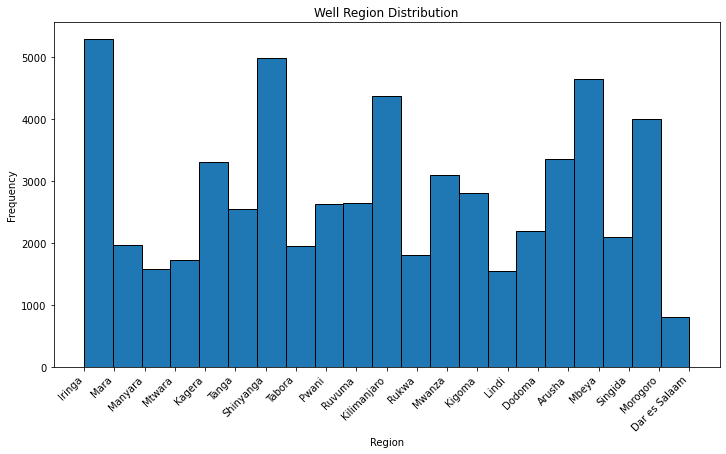

In [42]:
#Create a histogram of the 'Region' column
plt.figure(figsize=(10, 6))
plt.hist(train_df1['region'], bins= 21, edgecolor='black')
plt.xticks(rotation= 45, ha='right')
plt.tight_layout()
plt.title('Well Region Distribution')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

In [43]:
max_reg = train_df1['region'].value_counts().idxmax()
print(f'The region with the highest number of wells present is {max_reg}')

The region with the highest number of wells present is Iringa


In [44]:
train_df1['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [45]:
train_df1['district_code'].value_counts()
#district_code, lga,subvillage,longitude,latitude,basin, gps_height and ward

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [46]:
train_df1['lga'].value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

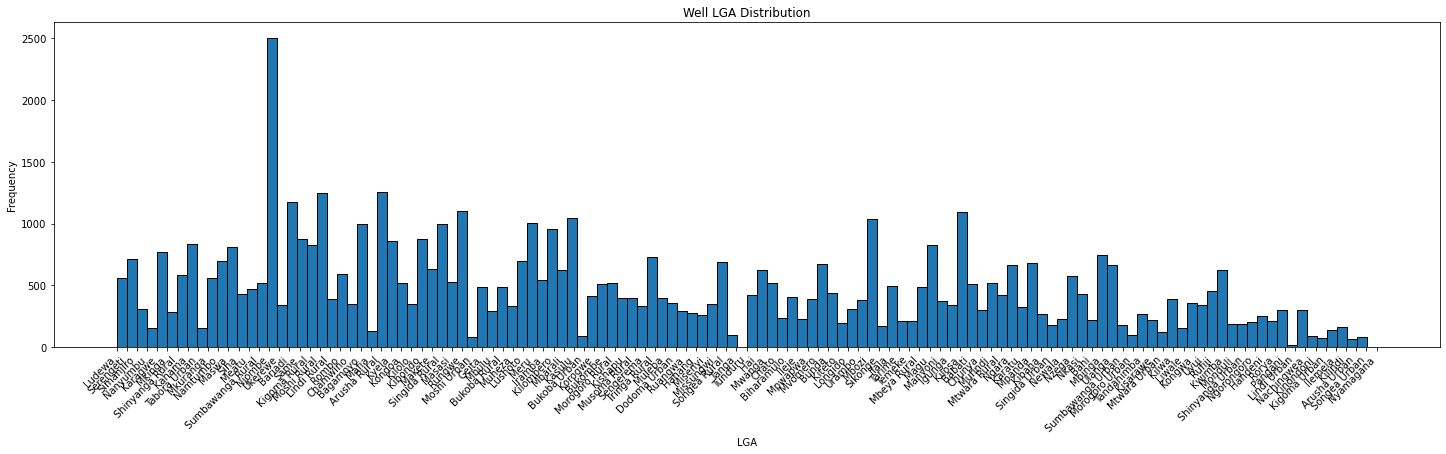

In [47]:
plt.figure(figsize=(20, 6))
plt.hist(train_df1['lga'], bins= 126, edgecolor='black')
plt.xticks(rotation= 45, ha='right')
plt.tight_layout()
plt.title('Well LGA Distribution')
plt.xlabel('LGA')
plt.ylabel('Frequency')
plt.show()

In [48]:
max_lag = train_df1['lga'].value_counts().idxmax()
print(f'The lga with the highest number of wells present is {max_lag}')

The lga with the highest number of wells present is Njombe


In [49]:
train_df1['subvillage'].value_counts()

Madukani           508
Shuleni            506
Majengo            502
Kati               373
Unknown            371
                  ... 
Kubegela             1
Ngwangwele           1
Oilmill              1
Mwanza Mangombe      1
Mianzi               1
Name: subvillage, Length: 19288, dtype: int64

In [50]:
train_df1['longitude'].value_counts()

0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
             ... 
37.579803       1
33.196490       1
34.017119       1
33.788326       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64

In [51]:
train_df1['latitude'].value_counts()

-2.000000e-08    1812
-6.985842e+00       2
-3.797579e+00       2
-6.981884e+00       2
-7.104625e+00       2
                 ... 
-5.726001e+00       1
-9.646831e+00       1
-8.124530e+00       1
-2.535985e+00       1
-2.598965e+00       1
Name: latitude, Length: 57517, dtype: int64

In [52]:
train_df1['ward'].value_counts()

Igosi            307
Imalinyi         252
Siha Kati        232
Mdandu           231
Nduruma          217
                ... 
Kihangimahuka      1
Thawi              1
Nyamtinga          1
Kitete             1
Igogo              1
Name: ward, Length: 2092, dtype: int64

In [53]:
train_df1['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

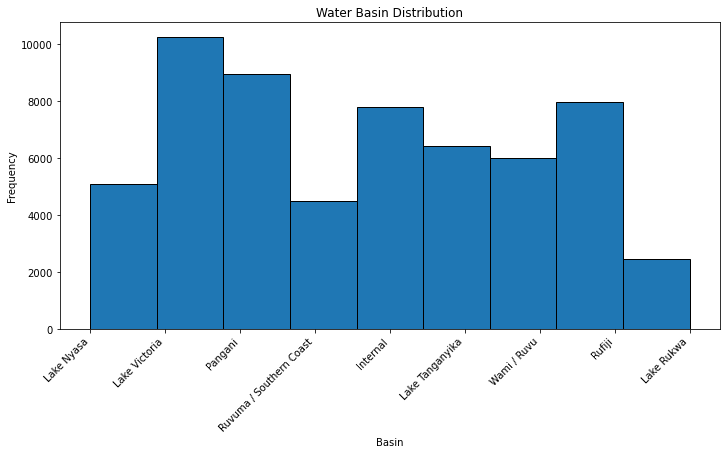

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(train_df1['basin'], bins= 9, edgecolor='black')
plt.xticks(rotation= 45, ha='right')
plt.tight_layout()
plt.title('Water Basin Distribution')
plt.xlabel('Basin')
plt.ylabel('Frequency')
plt.show()

In [55]:
max_bas = train_df1['basin'].value_counts().idxmax()
print(f'The Water basin with the highest number of wells present is {max_bas}')

The Water basin with the highest number of wells present is Lake Victoria


In [56]:
train_df1['gps_height'].value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

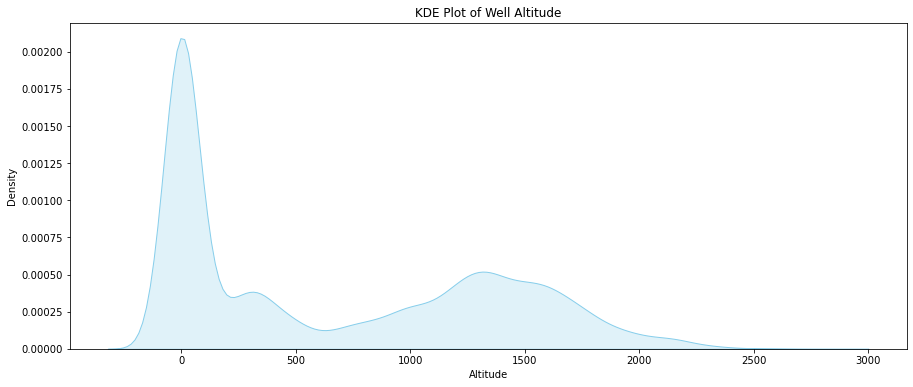

In [57]:
plt.figure(figsize=(15, 6))
sns.kdeplot(data=train_df1, x='gps_height', fill=True, color='skyblue')
plt.title('KDE Plot of Well Altitude')
plt.xlabel('Altitude')
plt.ylabel('Density')
plt.show()

In [58]:
max_alt = train_df1['gps_height'].value_counts().idxmax()
print(f'The Altitude at which most wells are found is {max_alt} meters above sea level')

The Altitude at which most wells are found is 0 meters above sea level


In [59]:
train_df1['wpt_name'].value_counts()

none                 3563
Shuleni              1748
Zahanati              830
Msikitini             535
Kanisani              323
                     ... 
Ustadh Hamis            1
Kwa Waziri Kutulo       1
Kwa Brendani            1
Kwa Kandosa             1
Zanzui                  1
Name: wpt_name, Length: 37400, dtype: int64

In [60]:
train_df1['num_private'].value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [61]:
train_df1.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

#### Pump and Well Infrastructure Columns

In [62]:
# Waterpoint
train_df1['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [63]:
train_df1['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

Waterpoint type group and Waterpoint type group seem to have similar value counts with the only difference being that waterpoint_type has 2 groups of communal standpipe ie. single and multiple communal standpipes.

In [64]:
#Extraction
train_df1['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [65]:
train_df1['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [66]:
train_df1['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

The extraction columns contain similar values. For ease of identification of the 'best' extraction method, the column to me kept is extraction_type_class.

In [67]:
#The columns are Construction year, Total Static Head(amount_tsh), , 'water_quality',
#'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
#'source_class', 'waterpoint_type', 'waterpoint_type_group'


In [68]:
# water quality
train_df1['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [69]:
train_df1['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [70]:
# water quantity
train_df1['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [71]:
train_df1['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [72]:
#water source
train_df1['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [73]:
train_df1['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [74]:
train_df1['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [75]:
#Total static head
train_df1['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [76]:
#construction year
train_df1['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

#### Social , Economic and Management Factors

In [77]:
#The columns are 'payment', 'payment_type', management','management_group'scheme_management', 
#'funder','population', 'public_meeting' and Installer.


In [78]:
train_df1['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [79]:
train_df1['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [80]:
train_df1['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [81]:
train_df1['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [82]:
train_df1['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Unknown              3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [83]:
train_df1['funder'].value_counts()

Government Of Tanzania    9084
Unknown                   3639
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Idf                          1
Yasini Selemani              1
Ramadhani M. Mvugalo         1
Mbeje                        1
Rc Mofu                      1
Name: funder, Length: 1897, dtype: int64

In [84]:
train_df1['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [85]:
train_df1['public_meeting'].value_counts()

True       51011
False       5055
Unknown     3334
Name: public_meeting, dtype: int64

In [86]:
train_df1['installer'].value_counts()

DWE                 17402
Unknown              3658
Government           1825
RWE                  1206
Commu                1060
                    ...  
TINA/Africare           1
Jafary Mbaga            1
LUKE SAMARAS LTD        1
Kanisa la TAG           1
Meru Concrete           1
Name: installer, Length: 2145, dtype: int64

In [87]:
train_df1.recorded_by.value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

#### Dropping irrelevant and duplicated columns

In [88]:
train_df1

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011,Unknown,0,Unknown,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [89]:
#Train
train_df2 = train_df1.drop(columns=['quantity_group','extraction_type_group', 'extraction_type_class',
                                    'quality_group','source_type','waterpoint_type_group',
                                    'recorded_by', 'wpt_name', 'num_private','waterpoint_type_group',
                                    'management','ward', 'payment' ] ,axis = 1)
#Test
test_df2 = test_df1.drop(columns=['quantity_group','extraction_type_group', 'extraction_type_class',
                                    'quality_group','source_type','waterpoint_type_group',
                                    'recorded_by', 'wpt_name', 'num_private','waterpoint_type_group',
                                    'management','ward', 'payment' ] ,axis = 1)


In [90]:
train_df2

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,...,permit,construction_year,extraction_type,management_group,payment_type,water_quality,quantity,source,source_class,waterpoint_type
0,69572,6000.0,2011,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,...,False,1999,gravity,user-group,annually,soft,enough,spring,groundwater,communal standpipe
1,8776,0.0,2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,...,True,2010,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe
2,34310,25.0,2013,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,...,True,2009,gravity,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple
3,67743,0.0,2013,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,...,True,1986,submersible,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple
4,19728,0.0,2011,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,...,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kiduruni,...,True,1999,gravity,user-group,per bucket,soft,enough,spring,groundwater,communal standpipe
59396,27263,4700.0,2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Igumbilo,...,True,1996,gravity,user-group,annually,soft,enough,river,surface,communal standpipe
59397,37057,0.0,2011,Unknown,0,Unknown,34.017087,-8.750434,Rufiji,Madungulu,...,False,0,swn 80,user-group,monthly,fluoride,enough,machine dbh,groundwater,hand pump
59398,31282,0.0,2011,Malec,0,Musa,35.861315,-6.378573,Rufiji,Mwinyi,...,True,0,nira/tanira,user-group,never pay,soft,insufficient,shallow well,groundwater,hand pump


In [91]:
test_df2

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,...,permit,construction_year,extraction_type,management_group,payment_type,water_quality,quantity,source,source_class,waterpoint_type
0,50785,0.0,2013,Dmdd,1996,DMDD,35.290799,-4.059696,Internal,Magoma,...,True,2012,other,parastatal,never pay,soft,seasonal,rainwater harvesting,surface,other
1,51630,0.0,2013,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Pangani,Kimnyak,...,True,2000,gravity,user-group,never pay,soft,insufficient,spring,groundwater,communal standpipe
2,17168,0.0,2013,Unknown,1567,Unknown,34.767863,-5.004344,Internal,Msatu,...,Unknown,2010,other,user-group,never pay,soft,insufficient,rainwater harvesting,surface,other
3,45559,0.0,2013,Finn Water,267,FINN WATER,38.058046,-9.418672,Ruvuma / Southern Coast,Kipindimbi,...,True,1987,other,user-group,unknown,soft,dry,shallow well,groundwater,other
4,49871,500.0,2013,Bruder,1260,BRUDER,35.006123,-10.950412,Ruvuma / Southern Coast,Losonga,...,True,2000,gravity,user-group,monthly,soft,enough,spring,groundwater,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011,Danida,34,Da,38.852669,-6.582841,Wami / Ruvu,Yombo,...,True,1988,mono,user-group,never pay,soft,enough,river,surface,communal standpipe
14846,18990,1000.0,2011,Hiap,0,HIAP,37.451633,-5.350428,Pangani,Mkondoa,...,False,1994,nira/tanira,user-group,annually,salty,insufficient,shallow well,groundwater,hand pump
14847,28749,0.0,2013,Unknown,1476,Unknown,34.739804,-4.585587,Internal,Juhudi,...,Unknown,2010,gravity,user-group,never pay,soft,insufficient,dam,surface,communal standpipe
14848,33492,0.0,2013,Germany,998,DWE,35.432732,-10.584159,Lake Nyasa,Namakinga B,...,True,2009,gravity,user-group,never pay,soft,insufficient,river,surface,communal standpipe


In [92]:
print(train_df2.shape)
print(test_df2.shape)

(59400, 27)
(14850, 27)


So far the test set has 14850 rows and 27 columns, whereaas the train set has 59400 rows and 27 columns.

#### Latitude and Longitudes

In [93]:
train_df2['longitude'].value_counts()

0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
             ... 
37.579803       1
33.196490       1
34.017119       1
33.788326       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64

In [94]:
train_df2['latitude'].value_counts()

-2.000000e-08    1812
-6.985842e+00       2
-3.797579e+00       2
-6.981884e+00       2
-7.104625e+00       2
                 ... 
-5.726001e+00       1
-9.646831e+00       1
-8.124530e+00       1
-2.535985e+00       1
-2.598965e+00       1
Name: latitude, Length: 57517, dtype: int64

In [95]:
test_df2['latitude'].value_counts()

-2.000000e-08    457
-7.105919e+00      2
-2.474560e+00      2
-7.170666e+00      2
-6.990042e+00      2
                ... 
-9.320133e+00      1
-9.114386e+00      1
-3.134371e+00      1
-3.885609e+00      1
-8.477215e+00      1
Name: latitude, Length: 14390, dtype: int64

In [96]:
test_df2['longitude'].value_counts()

0.000000     457
37.302281      2
32.920579      2
37.260069      2
39.080573      2
            ... 
30.926134      1
37.227967      1
36.032819      1
35.628949      1
35.894087      1
Name: longitude, Length: 14390, dtype: int64

Tanzania does not lie within the equator(latitude = 0) or the Greenwich Meridan(longitude=0) therefore rows containing zero points(0,0) will dropped.

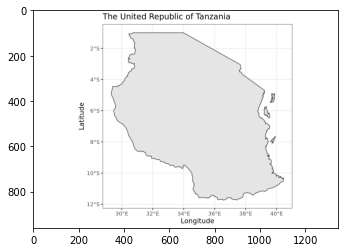

In [97]:
#Import image of Tanzania
image = mpimg.imread("Images/Tanzania.png")
plt.imshow(image)
plt.show()

In [98]:
# Filter out rows where the 'Value' column is 0
train_df3 = train_df2[train_df2['longitude'] != 0]

print("\nDataFrame after dropping rows with 0:\n",train_df3)


DataFrame after dropping rows with 0:
           id  amount_tsh  date_recorded           funder  gps_height  \
0      69572      6000.0           2011            Roman        1390   
1       8776         0.0           2013          Grumeti        1399   
2      34310        25.0           2013     Lottery Club         686   
3      67743         0.0           2013           Unicef         263   
4      19728         0.0           2011      Action In A           0   
...      ...         ...            ...              ...         ...   
59395  60739        10.0           2013  Germany Republi        1210   
59396  27263      4700.0           2011      Cefa-njombe        1212   
59397  37057         0.0           2011          Unknown           0   
59398  31282         0.0           2011            Malec           0   
59399  26348         0.0           2011       World Bank         191   

          installer  longitude   latitude                    basin  \
0             Roman  34.9

In [99]:

train_df3 = train_df3[train_df3['latitude'] != 0]

print("\nDataFrame after dropping rows with 0:\n",train_df3)


DataFrame after dropping rows with 0:
           id  amount_tsh  date_recorded           funder  gps_height  \
0      69572      6000.0           2011            Roman        1390   
1       8776         0.0           2013          Grumeti        1399   
2      34310        25.0           2013     Lottery Club         686   
3      67743         0.0           2013           Unicef         263   
4      19728         0.0           2011      Action In A           0   
...      ...         ...            ...              ...         ...   
59395  60739        10.0           2013  Germany Republi        1210   
59396  27263      4700.0           2011      Cefa-njombe        1212   
59397  37057         0.0           2011          Unknown           0   
59398  31282         0.0           2011            Malec           0   
59399  26348         0.0           2011       World Bank         191   

          installer  longitude   latitude                    basin  \
0             Roman  34.9

In [100]:
train_df3

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,...,permit,construction_year,extraction_type,management_group,payment_type,water_quality,quantity,source,source_class,waterpoint_type
0,69572,6000.0,2011,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,...,False,1999,gravity,user-group,annually,soft,enough,spring,groundwater,communal standpipe
1,8776,0.0,2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,...,True,2010,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe
2,34310,25.0,2013,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,...,True,2009,gravity,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple
3,67743,0.0,2013,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,...,True,1986,submersible,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple
4,19728,0.0,2011,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,...,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kiduruni,...,True,1999,gravity,user-group,per bucket,soft,enough,spring,groundwater,communal standpipe
59396,27263,4700.0,2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Igumbilo,...,True,1996,gravity,user-group,annually,soft,enough,river,surface,communal standpipe
59397,37057,0.0,2011,Unknown,0,Unknown,34.017087,-8.750434,Rufiji,Madungulu,...,False,0,swn 80,user-group,monthly,fluoride,enough,machine dbh,groundwater,hand pump
59398,31282,0.0,2011,Malec,0,Musa,35.861315,-6.378573,Rufiji,Mwinyi,...,True,0,nira/tanira,user-group,never pay,soft,insufficient,shallow well,groundwater,hand pump


In [101]:
# Test
test_df3 = test_df2[test_df2['longitude'] != 0]

print("\nDataFrame after dropping rows with 0:\n",test_df3)


DataFrame after dropping rows with 0:
           id  amount_tsh  date_recorded                  funder  gps_height  \
0      50785         0.0           2013                    Dmdd        1996   
1      51630         0.0           2013  Government Of Tanzania        1569   
2      17168         0.0           2013                 Unknown        1567   
3      45559         0.0           2013              Finn Water         267   
4      49871       500.0           2013                  Bruder        1260   
...      ...         ...            ...                     ...         ...   
14845  39307         0.0           2011                  Danida          34   
14846  18990      1000.0           2011                    Hiap           0   
14847  28749         0.0           2013                 Unknown        1476   
14848  33492         0.0           2013                 Germany         998   
14849  68707         0.0           2013  Government Of Tanzania         481   

        ins

In [102]:
test_df3 = test_df3[test_df3['latitude'] != 0]

print("\nDataFrame after dropping rows with 0:\n",test_df3)


DataFrame after dropping rows with 0:
           id  amount_tsh  date_recorded                  funder  gps_height  \
0      50785         0.0           2013                    Dmdd        1996   
1      51630         0.0           2013  Government Of Tanzania        1569   
2      17168         0.0           2013                 Unknown        1567   
3      45559         0.0           2013              Finn Water         267   
4      49871       500.0           2013                  Bruder        1260   
...      ...         ...            ...                     ...         ...   
14845  39307         0.0           2011                  Danida          34   
14846  18990      1000.0           2011                    Hiap           0   
14847  28749         0.0           2013                 Unknown        1476   
14848  33492         0.0           2013                 Germany         998   
14849  68707         0.0           2013  Government Of Tanzania         481   

        ins

In [103]:
# Concatenate vertically

concat = pd.concat([train_df3, test_df3])

print("\nVertically Concatenated DataFrame (default behavior):")
print(concat)


Vertically Concatenated DataFrame (default behavior):
          id  amount_tsh  date_recorded                  funder  gps_height  \
0      69572      6000.0           2011                   Roman        1390   
1       8776         0.0           2013                 Grumeti        1399   
2      34310        25.0           2013            Lottery Club         686   
3      67743         0.0           2013                  Unicef         263   
4      19728         0.0           2011             Action In A           0   
...      ...         ...            ...                     ...         ...   
14845  39307         0.0           2011                  Danida          34   
14846  18990      1000.0           2011                    Hiap           0   
14847  28749         0.0           2013                 Unknown        1476   
14848  33492         0.0           2013                 Germany         998   
14849  68707         0.0           2013  Government Of Tanzania         481 

In [105]:
df= pd.concat([concat, train_status], axis = 1, join= 'inner')
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,...,extraction_type,management_group,payment_type,water_quality,quantity,source,source_class,waterpoint_type,id,status_group
0,69572,6000.0,2011,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,...,gravity,user-group,annually,soft,enough,spring,groundwater,communal standpipe,69572,functional
1,8776,0.0,2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,...,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,8776,functional
2,34310,25.0,2013,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,...,gravity,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple,34310,functional
3,67743,0.0,2013,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,...,submersible,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,67743,non functional
4,19728,0.0,2011,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,...,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,19728,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011,Danida,34,Da,38.852669,-6.582841,Wami / Ruvu,Yombo,...,mono,user-group,never pay,soft,enough,river,surface,communal standpipe,57672,functional
14846,18990,1000.0,2011,Hiap,0,HIAP,37.451633,-5.350428,Pangani,Mkondoa,...,nira/tanira,user-group,annually,salty,insufficient,shallow well,groundwater,hand pump,32099,non functional
14847,28749,0.0,2013,Unknown,1476,Unknown,34.739804,-4.585587,Internal,Juhudi,...,gravity,user-group,never pay,soft,insufficient,dam,surface,communal standpipe,35745,non functional
14848,33492,0.0,2013,Germany,998,DWE,35.432732,-10.584159,Lake Nyasa,Namakinga B,...,gravity,user-group,never pay,soft,insufficient,river,surface,communal standpipe,30578,functional


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71981 entries, 0 to 14849
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 71981 non-null  int64  
 1   amount_tsh         71981 non-null  float64
 2   date_recorded      71981 non-null  int64  
 3   funder             71981 non-null  object 
 4   gps_height         71981 non-null  int64  
 5   installer          71981 non-null  object 
 6   longitude          71981 non-null  float64
 7   latitude           71981 non-null  float64
 8   basin              71981 non-null  object 
 9   subvillage         71981 non-null  object 
 10  region             71981 non-null  object 
 11  region_code        71981 non-null  int64  
 12  district_code      71981 non-null  int64  
 13  lga                71981 non-null  object 
 14  population         71981 non-null  int64  
 15  public_meeting     71981 non-null  object 
 16  scheme_management  719

In [108]:
df.shape

(71981, 29)

In [109]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'management_group', 'payment_type', 'water_quality', 'quantity',
       'source', 'source_class', 'waterpoint_type', 'id', 'status_group'],
      dtype='object')

In [110]:
# Create a new DataFrame without 'col_B'
df_without_id = df.drop(columns=['id'])

print("\nDataFrame after dropping 'id':")
print(df_without_id)

# The original DataFrame is unchanged
print("\nOriginal DataFrame (unchanged):")
print(df)


DataFrame after dropping 'id':
       amount_tsh  date_recorded                  funder  gps_height  \
0          6000.0           2011                   Roman        1390   
1             0.0           2013                 Grumeti        1399   
2            25.0           2013            Lottery Club         686   
3             0.0           2013                  Unicef         263   
4             0.0           2011             Action In A           0   
...           ...            ...                     ...         ...   
14845         0.0           2011                  Danida          34   
14846      1000.0           2011                    Hiap           0   
14847         0.0           2013                 Unknown        1476   
14848         0.0           2013                 Germany         998   
14849         0.0           2013  Government Of Tanzania         481   

          installer  longitude   latitude                    basin  \
0             Roman  34.938093  -

In [111]:
df_without_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71981 entries, 0 to 14849
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         71981 non-null  float64
 1   date_recorded      71981 non-null  int64  
 2   funder             71981 non-null  object 
 3   gps_height         71981 non-null  int64  
 4   installer          71981 non-null  object 
 5   longitude          71981 non-null  float64
 6   latitude           71981 non-null  float64
 7   basin              71981 non-null  object 
 8   subvillage         71981 non-null  object 
 9   region             71981 non-null  object 
 10  region_code        71981 non-null  int64  
 11  district_code      71981 non-null  int64  
 12  lga                71981 non-null  object 
 13  population         71981 non-null  int64  
 14  public_meeting     71981 non-null  object 
 15  scheme_management  71981 non-null  object 
 16  permit             719

In [112]:
df_without_id.isna().sum()

amount_tsh           0
date_recorded        0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
basin                0
subvillage           0
region               0
region_code          0
district_code        0
lga                  0
population           0
public_meeting       0
scheme_management    0
permit               0
construction_year    0
extraction_type      0
management_group     0
payment_type         0
water_quality        0
quantity             0
source               0
source_class         0
waterpoint_type      0
status_group         0
dtype: int64

In [142]:
df_without_id = df_without_id.drop(columns=['region_code','district_code'], axis = 1)

print("\nDataFrame after dropping 'id':")
print(df_without_id)


DataFrame after dropping 'id':
       amount_tsh                 date_recorded                  funder  \
0          6000.0 1970-01-01 00:00:00.000002011                   Roman   
1             0.0 1970-01-01 00:00:00.000002013                 Grumeti   
2            25.0 1970-01-01 00:00:00.000002013            Lottery Club   
3             0.0 1970-01-01 00:00:00.000002013                  Unicef   
4             0.0 1970-01-01 00:00:00.000002011             Action In A   
...           ...                           ...                     ...   
14845         0.0 1970-01-01 00:00:00.000002011                  Danida   
14846      1000.0 1970-01-01 00:00:00.000002011                    Hiap   
14847         0.0 1970-01-01 00:00:00.000002013                 Unknown   
14848         0.0 1970-01-01 00:00:00.000002013                 Germany   
14849         0.0 1970-01-01 00:00:00.000002013  Government Of Tanzania   

       gps_height     installer  longitude   latitude  \
0         

In [132]:
df_without_id['date_recorded']= pd.to_datetime(df_without_id['date_recorded'])
df_without_id['date_recorded'].dtypes

<ipython-input-132-2751476f5030>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_id['date_recorded']= pd.to_datetime(df_without_id['date_recorded'])


dtype('<M8[ns]')

In [130]:
df_without_id['construction_year'].dtypes

dtype('int64')

## 4. EDA

### Univariate Analysis

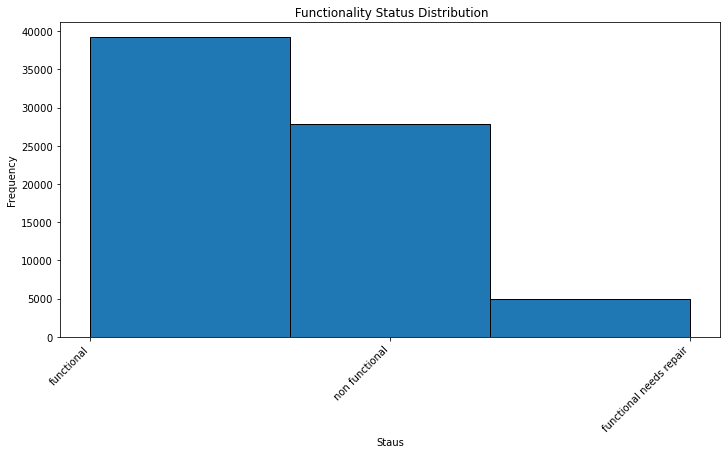

In [114]:
### status_group distribution

plt.figure(figsize=(10, 6))
plt.hist(df_without_id['status_group'], bins= 3, edgecolor='black')
plt.xticks(rotation= 45, ha='right')
plt.tight_layout()
plt.title(' Functionality Status Distribution')
plt.xlabel('Staus')
plt.ylabel('Frequency')
plt.show()

**observation**
 - Most wells are fully functional, indicating a class imbalance in the 3 classes. 

#### Categorical Features


--- Value Counts for: status_group ---
functional                 39198
non functional             27803
functional needs repair     4980
Name: status_group, dtype: int64

--- Value Counts for: funder ---
Government Of Tanzania    11003
Unknown                    4493
Danida                     3907
Hesawa                     2414
World Bank                 1693
                          ...  
Magige                        1
Kwa Makala                    1
Mwita Kichere                 1
Comune Di Roma                1
Rc Mofu                       1
Name: funder, Length: 2091, dtype: int64

--- Value Counts for: installer ---
DWE                        20310
Unknown                     4515
Government                  2096
RWE                         1467
Commu                       1347
                           ...  
Village Office                 1
DWE/Ubalozi wa Marekani        1
Yasini Selemani                1
Patrick Marwa                  1
W.D $                          1
N

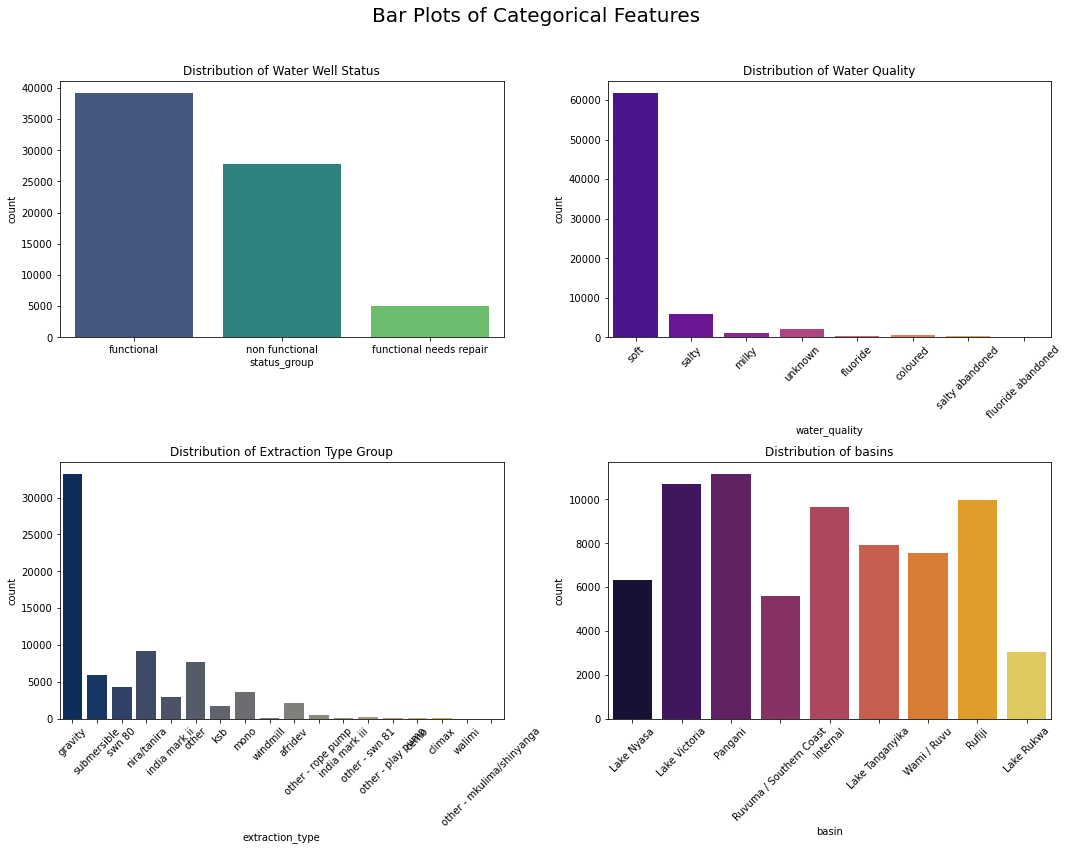

In [126]:
#Get value counts for a few key categorical features
categorical_features = ['status_group', 'funder', 'installer', 'basin', 'water_quality', 'extraction_type']

for feature in categorical_features:
    print(f"\n--- Value Counts for: {feature} ---")
    print(df_without_id[feature].value_counts())

# Plot bar charts for key categorical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle('Bar Plots of Categorical Features', fontsize=20)

# The target variable: status_group
sns.countplot(x='status_group', data=df_without_id, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Distribution of Water Well Status')

# Example categorical feature: water_quality
sns.countplot(x='water_quality', data=df_without_id, ax=axes[0, 1], palette='plasma')
axes[0, 1].set_title('Distribution of Water Quality')
axes[0, 1].tick_params(axis='x', rotation=45)

# Example categorical feature: extraction_type_group
sns.countplot(x='extraction_type', data=df_without_id, ax=axes[1, 0], palette='cividis')
axes[1, 0].set_title('Distribution of Extraction Type Group')
axes[1, 0].tick_params(axis='x', rotation=45)

# Example categorical feature: management
sns.countplot(x='basin', data=df_without_id, ax=axes[1, 1], palette='inferno')
axes[1, 1].set_title('Distribution of basins')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
###gps_height

plt.figure(figsize=(10, 6))
plt.hist(df_without_id['gps_height'], bins= , edgecolor='black')
plt.xticks(rotation= 45, ha='right')
plt.tight_layout()
plt.title(' Altitude Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [143]:
# Descriptive statistics
print(df_without_id.describe())

# Plot histograms for a few key numerical features

numerical_features = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'construction_year']

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Histograms of Numerical Features', fontsize=20)

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.histplot(df[feature], ax=axes[row, col], kde=True)
    axes[row, col].set_title(feature)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

          amount_tsh    gps_height     longitude      latitude    population  \
count   71981.000000  71981.000000  71981.000000  71981.000000  71981.000000   
mean      328.731381    686.650616     35.148358     -5.881503    186.448493   
std      2951.661960    693.280413      2.608924      2.808758    477.341984   
min         0.000000    -90.000000     29.607122    -11.649440      0.000000   
25%         0.000000      0.000000     33.277747     -8.632576      0.000000   
50%         0.000000    418.000000     35.007072     -5.173950     35.000000   
75%        30.000000   1330.000000     37.237383     -3.371872    230.000000   
max    350000.000000   2777.000000     40.345193     -0.998464  30500.000000   

       construction_year  
count       71981.000000  
mean         1339.394090  
std           938.475708  
min             0.000000  
25%             0.000000  
50%          1988.000000  
75%          2005.000000  
max          2013.000000  


OSError: 'seaborn-v0_8-whitegrid' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

### Bivariate Analysis

#### Water Features

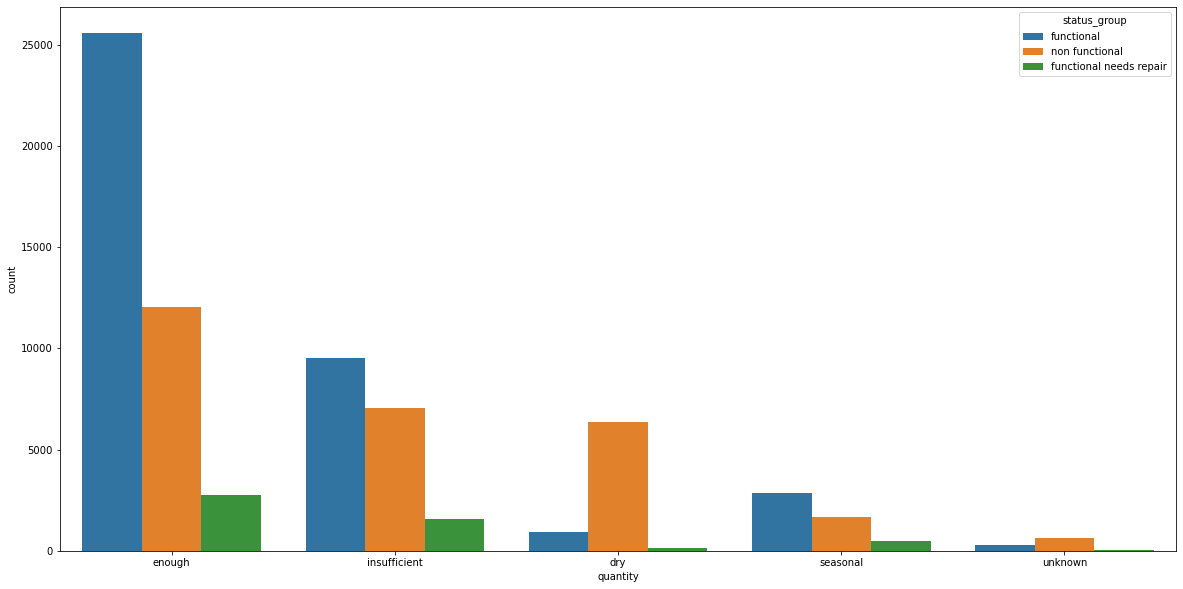

In [141]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='quantity', hue="status_group", data=df_without_id)

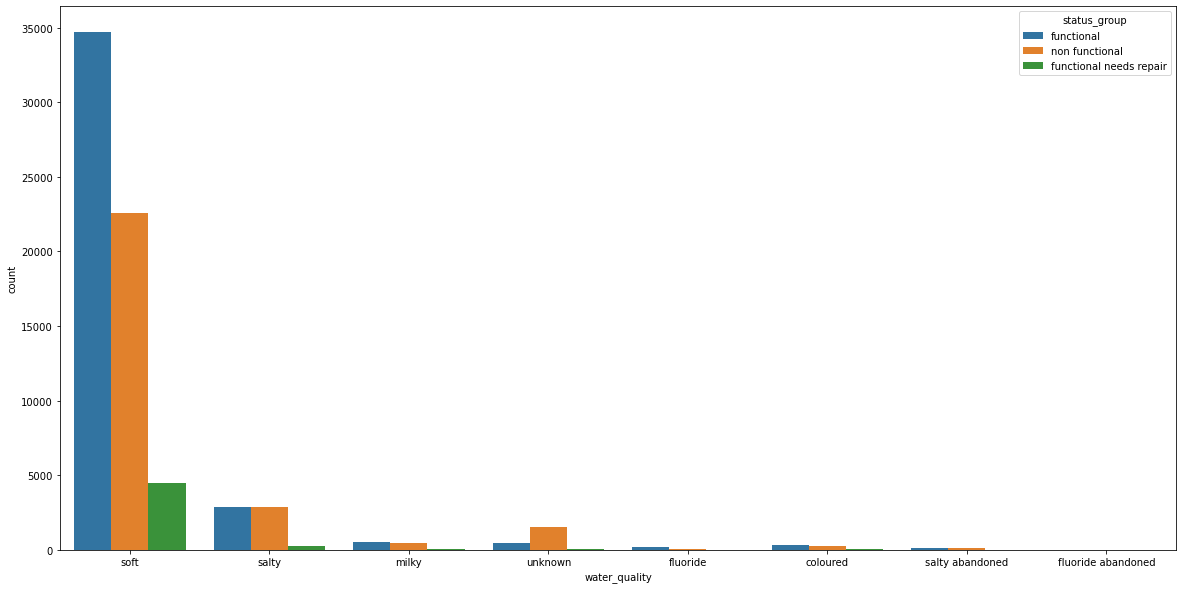

In [140]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=df_without_id)

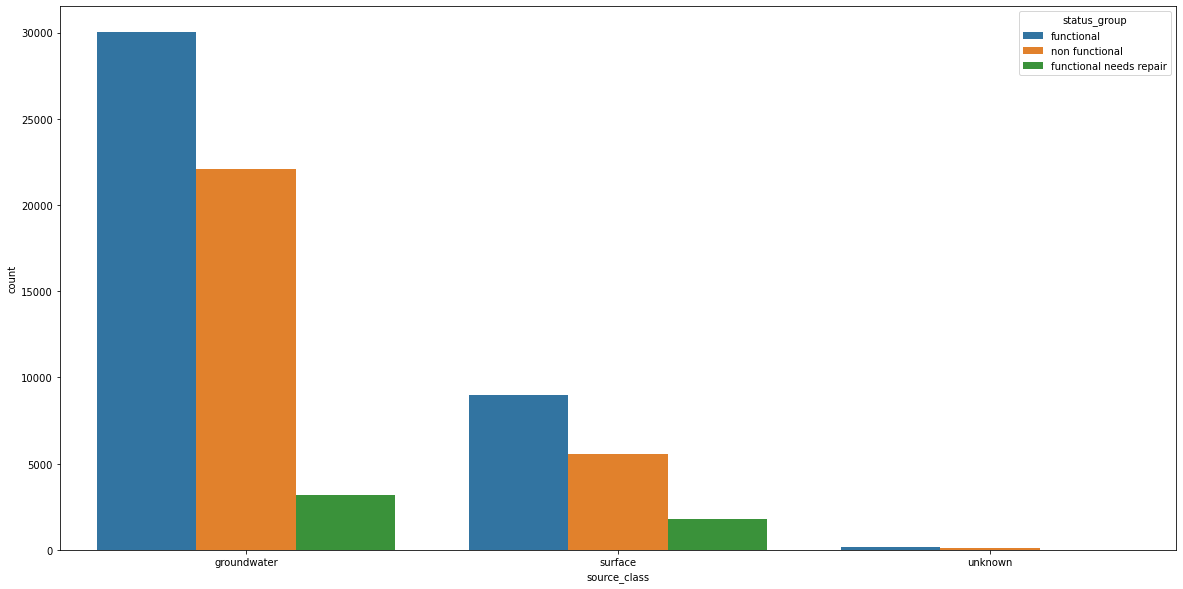

In [145]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='source_class', hue="status_group", data=df_without_id)

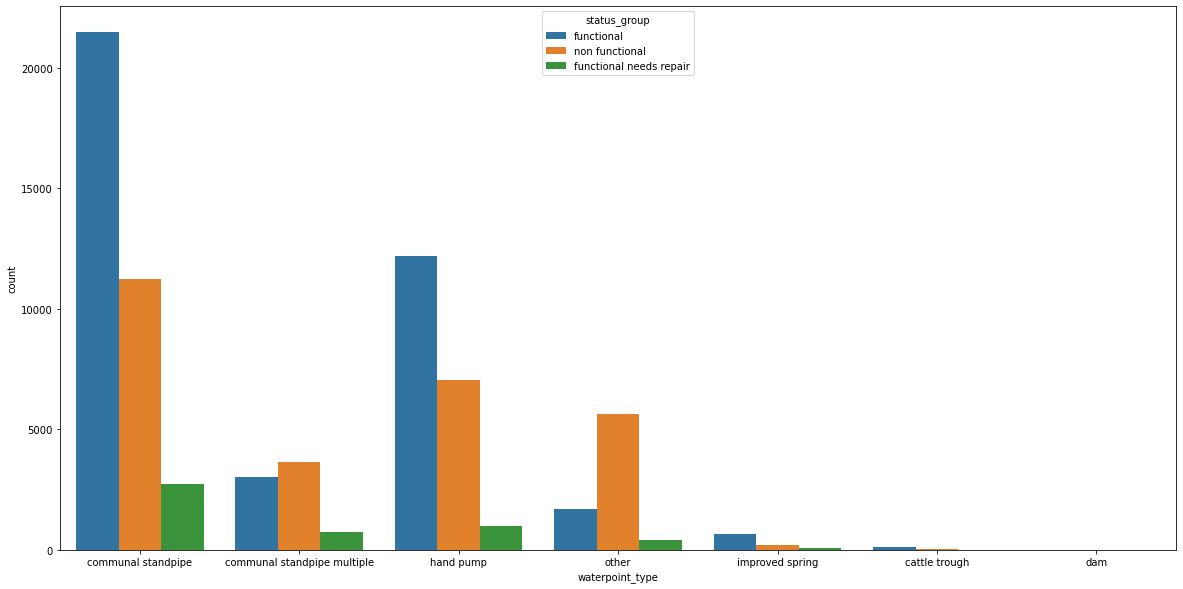

In [147]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='waterpoint_type', hue="status_group", data=df_without_id)

**Observation**
* Most functional wells are found at a communalstandpipe water point.
* Water quality in most of the functional wells is soft.
* Majority of the fuctional wells have enough water and are from a groundwater source.

In [144]:
df_without_id.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'basin', 'subvillage', 'region', 'lga',
       'population', 'public_meeting', 'scheme_management', 'permit',
       'construction_year', 'extraction_type', 'management_group',
       'payment_type', 'water_quality', 'quantity', 'source', 'source_class',
       'waterpoint_type', 'status_group'],
      dtype='object')

#### Socio-Economic Features

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='population', hue="status_group", data=df_without_id)

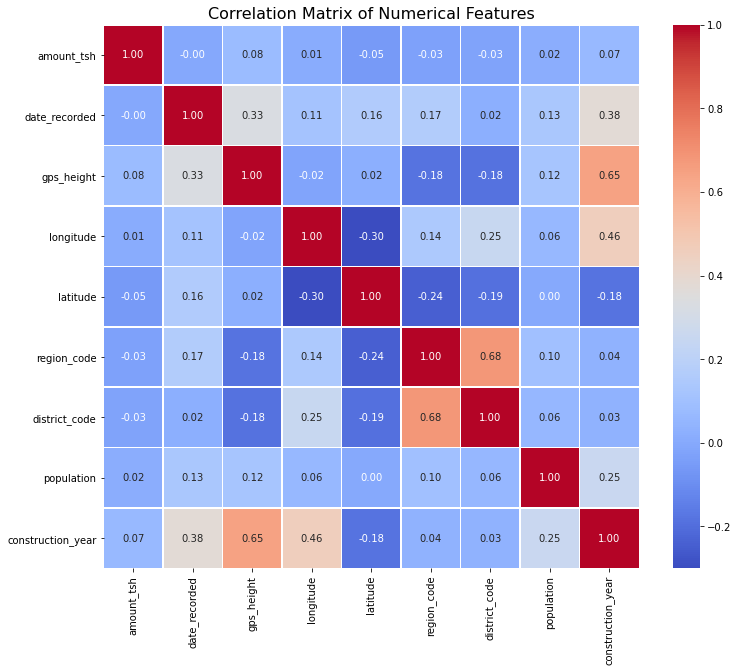

In [120]:
# Select only numerical columns for the correlation matrix
numerical_df = df_without_id.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

### Multivariate Analysis